<a href="https://colab.research.google.com/github/sttesta3/7506R-1C2024-GRUPO08/blob/santiago/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Seteo inicial del notebook y carga de datos

In [ ]:
# General libs
import pandas as pd
import numpy as np

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

#Modelos
from sklearn.cluster import KMeans

# KFold cross validation
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Otras librerías
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [ ]:
# Ruta donde van a estar todos los datasets
ruta = "https://raw.githubusercontent.com/sttesta3/7506R-1C2024-GRUPO08/fede/datasets/"
ds = pd.read_csv(ruta + "ds_filtrado.csv")

ds.drop(columns="start_date",inplace=True)
ds.drop(columns="place_l3",inplace=True)
ds.drop(columns="property_type",inplace=True)

ds.info()

ds_train, ds_test = train_test_split(ds, test_size=0.2 , random_state=2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52366 entries, 0 to 52365
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   latitud                   52366 non-null  float64
 1   longitud                  52366 non-null  float64
 2   property_rooms            52366 non-null  int64  
 3   property_bedrooms         52366 non-null  int64  
 4   property_surface_total    52366 non-null  float64
 5   property_surface_covered  52366 non-null  float64
 6   property_price            52366 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 2.8 MB


### CLUSTERING con KMEANS

#### KMEANS. Busqueda de cantidad de clusters optima

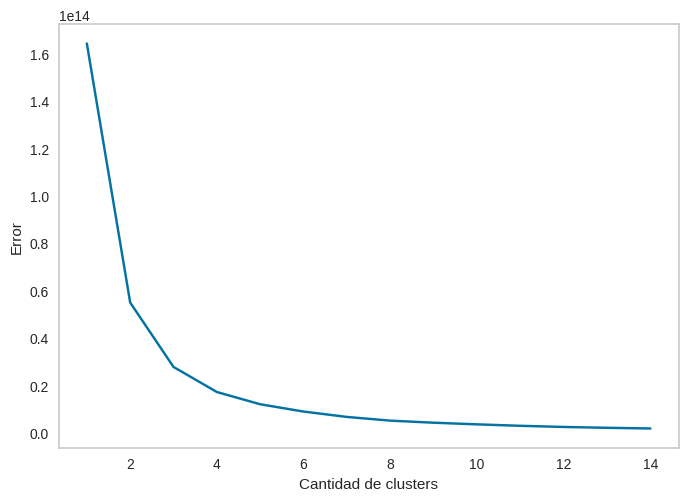

In [16]:
# Corro el algoritmo con K entre 2 y 10 y voy guardando el error para luego graficarlo.
errores = []
variacion = []

for clusters in range(1,15):
    km = KMeans(n_clusters=clusters)
    km.fit(ds_train)
    errores.append(km.inertia_)

plt.plot(range(1,15), errores)
plt.xlabel("Cantidad de clusters")
plt.ylabel("Error")
plt.grid()
plt.show()

##### ANALISIS: Hemos encontrado la cantidad óptima de clusters "aka codo" en tres clusters. Podríamos buscar una cantidad superior, pero parecería que  

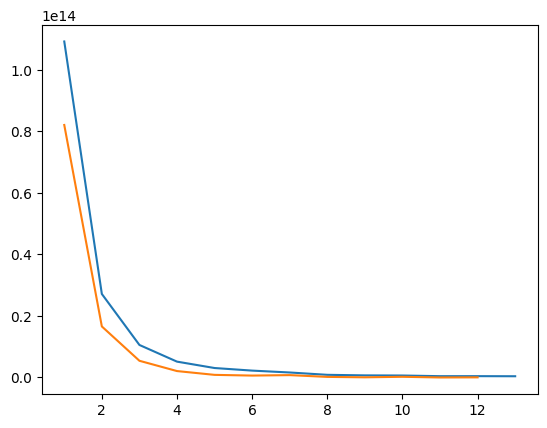

In [ ]:
# Experimental para el  codo, guardado por las dudas
variacion = []
aceleracion = []

for i in range(1,len(errores)):
  variacion.append(errores[i-1] - errores[i])

for i in range(1,len(variacion)):
  aceleracion.append(variacion[i-1] - variacion[i])

plt.plot(range(1,len(errores)),variacion)
plt.plot(range(1,len(variacion)),aceleracion)
plt.show()

#### SILHOUETTE

In [8]:
# Esto es probablemente innecesario, pero sabemos que hay tendencia al cluster en los datos
from sklearn.metrics import silhouette_score

for n_clusters in range(2, 7):
    km = KMeans(n_clusters=n_clusters)
    preds = km.fit_predict(ds_train)

    score = silhouette_score (ds_train, preds)
    print ("For n_clusters =" + str(n_clusters) + " silhouette score is " + str(score))

For n_clusters =2 silhouette score is 0.6349128354087819
For n_clusters =3 silhouette score is 0.5789000989683283
For n_clusters =4 silhouette score is 0.5693536451072837
For n_clusters =5 silhouette score is 0.5666764382934876
For n_clusters =6 silhouette score is 0.5250339516567122


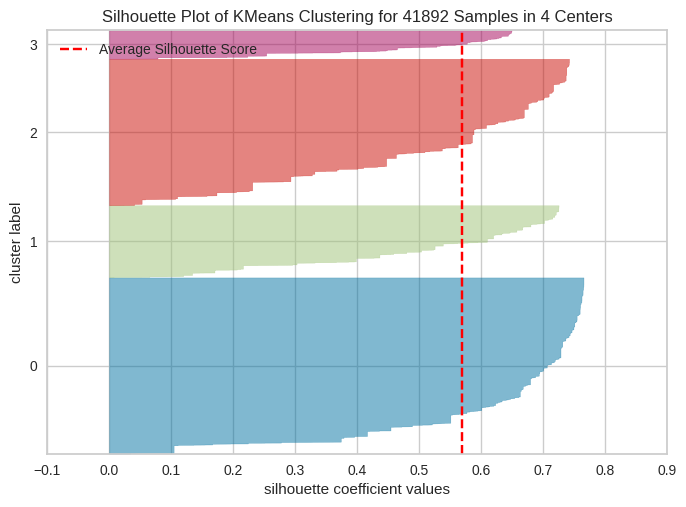

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 41892 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
from yellowbrick.cluster import SilhouetteVisualizer

modelo = KMeans(4, random_state=0)

# Visualizamos el gráfico de silueta
visualizador = SilhouetteVisualizer(modelo, colors='yellowbrick')    # Instancio el visualizador
visualizador.fit(ds_train)
visualizador.show()


In [27]:
visualizador_2= SilhouetteVisualizer(modelo, colors='yellowbrick')    # Instancio el visualizador
visualizador_2.fit(ds_train)
plt.xlabel("Coeficiente de silhouette")
plt.show()

KeyboardInterrupt: 

##### Pequeña prueba de resultado con distinta cantidad de clusters

In [29]:
## Comparativa con seis. Practicamente mismo resultado y dos dummies
modelo_test = KMeans(6, random_state=0)

visualizador_test= SilhouetteVisualizer(modelo_test, colors='yellowbrick')    # Instancio el visualizador
visualizador_test.fit(ds_train)
visualizador_test.show()

KeyboardInterrupt: 

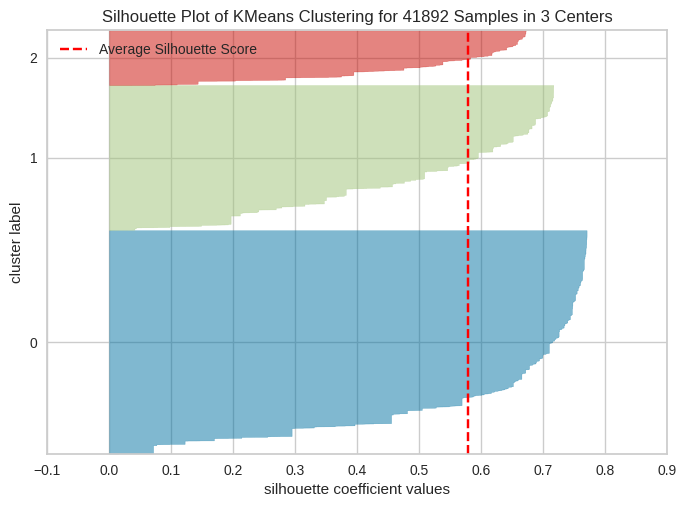

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 41892 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [30]:
modelo_test_3 = KMeans(3, random_state=0)

visualizador_test_3= SilhouetteVisualizer(modelo_test_3, colors='yellowbrick')    # Instancio el visualizador
visualizador_test_3.fit(ds_train)
visualizador_test_3.show()

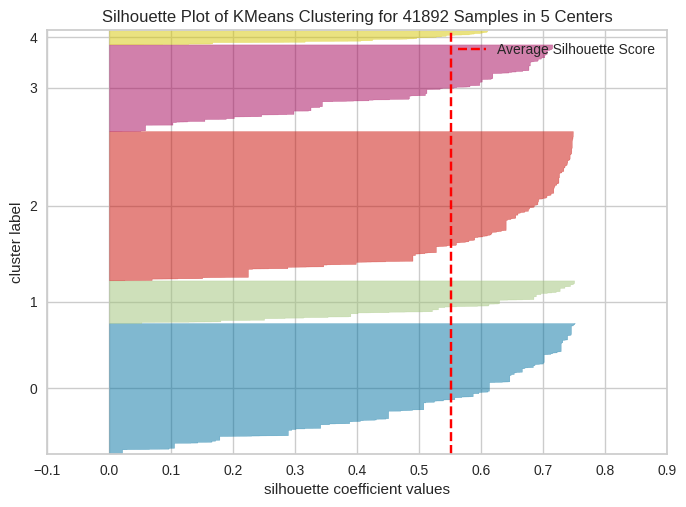

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 41892 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [31]:
modelo_test_5 = KMeans(5, random_state=0)

visualizador_test_5= SilhouetteVisualizer(modelo_test_5, colors='yellowbrick')    # Instancio el visualizador
visualizador_test_5.fit(ds_train)
visualizador_test_5.show()

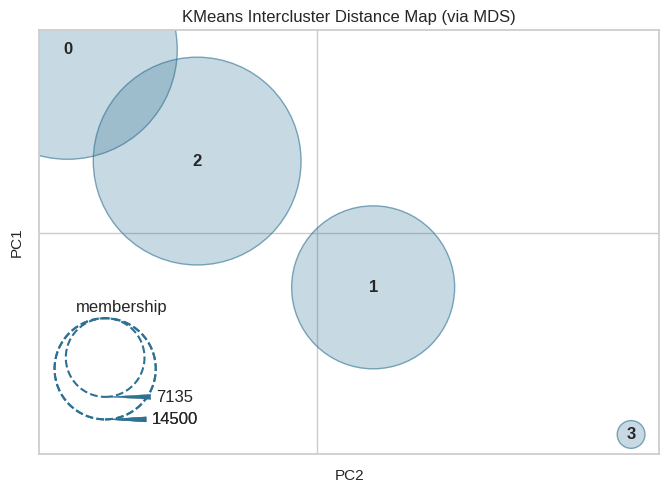

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [25]:
# EXPERIMENTAL. Distancia con MDS para reducir dimensiones
from yellowbrick.cluster import InterclusterDistance

visualizador_mds = InterclusterDistance(modelo)
visualizador_mds.fit(ds_train)
visualizador_mds.show()

##### ANALISIS: Podemos observar que los clusters tienen un promedio del coeficiente de silhouette similar ( entre un 0.5 y 0.6 ) pero tienen densidades diferentes, donde el azul y el rojo tienen aproximadamente mil quinientas observaciones cada uno, mientras que los otros dos parecerían tener quinientas.